I am adding a season column because we will need that to merge on the two seperate tables

In [5]:
import pandas as pd

injuries_df = pd.read_csv("/Users/noah/Desktop/NBA_injuries_project/ACL_Ach_final.csv")

## switching date column to datetime
injuries_df["date"] =  pd.to_datetime(injuries_df["date"])


def assign_season(date):
    if date <= pd.Timestamp("2010-06-05"):
        return "2009-10"
    elif date <= pd.Timestamp("2011-06-05"):
        return "2010-11"
    elif date <= pd.Timestamp("2012-06-05"):
        return "2011-12"
    elif date <= pd.Timestamp("2013-06-05"):
        return "2012-13"
    elif date <= pd.Timestamp("2014-06-05"):
        return "2013-14"
    elif date <= pd.Timestamp("2015-06-05"):
        return "2014-15"
    elif date <= pd.Timestamp("2016-06-05"):
        return "2015-16"
    elif date <= pd.Timestamp("2017-06-05"):
        return "2016-17"
    elif date <= pd.Timestamp("2018-06-05"):
        return "2017-18"
    elif date <= pd.Timestamp("2019-06-05"):
        return "2018-19"
    
    # Special case: COVID Bubble Season ended Oct 11, 2020
    elif date <= pd.Timestamp("2020-10-11"):
        return "2019-20"
    elif date <= pd.Timestamp("2021-06-05"):
        return "2020-21"
    elif date <= pd.Timestamp("2022-06-05"):
        return "2021-22"
    elif date <= pd.Timestamp("2023-06-05"):
        return "2022-23"
    elif date <= pd.Timestamp("2024-06-05"):
        return "2023-24"
    else:
        return "2024-25"

injuries_df2 = injuries_df.copy()

injuries_df2["season"] = injuries_df["date"].apply(assign_season).copy()


In [297]:
injuries_df2.head()

,player,reason,date,team,season
0,Jonas Jerebko,torn achilles,2010-10-06,Pistons,2010-11
1,Jeff Ayres,torn acl,2010-10-08,Blazers,2010-11
2,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11
3,Michael Redd,torn acl,2010-10-27,Bucks,2010-11
4,Mehmet Okur,torn achilles,2010-10-27,Jazz,2010-11


Now I wannt to add a previous_season a previous_previous_season a next_season and a next_next_season. This will be helpfully when comparing seasons later on

In [298]:
def shift_season(season_str, offset):
    try:
        start_year = int(season_str[:4])
        new_start = start_year + offset
        new_end = str(new_start + 1)[-2:]  # last two digits of next year
        return f"{new_start}-{new_end}"
    except:
        return None  # handle bad input gracefully

# Apply to your DataFrame
injuries_df2["prev_season"] = injuries_df2["season"].apply(lambda s: shift_season(s, -1))
injuries_df2["prev_prev_season"] = injuries_df2["season"].apply(lambda s: shift_season(s, -2))
injuries_df2["next_season"] = injuries_df2["season"].apply(lambda s: shift_season(s, 1))
injuries_df2["next_next_season"] = injuries_df2["season"].apply(lambda s: shift_season(s, 2))


In [6]:
injuries_df2.head()

,player,reason,date,team,season
0,Jonas Jerebko,torn achilles,2010-10-06,Pistons,2010-11
1,Jeff Ayres,torn acl,2010-10-08,Blazers,2010-11
2,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11
3,Michael Redd,torn acl,2010-10-27,Bucks,2010-11
4,Mehmet Okur,torn achilles,2010-10-27,Jazz,2010-11


In [300]:
injuries_df2.to_csv("/Users/noah/Desktop/NBA_injuries_project/injuries_with_seasons", index = False)

In [44]:
all_stats = pd.read_csv("old_all_seasons_stats.csv")

In [302]:
all_stats.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional,season
0,238,A.J. Price,23,IND,PG,56,2,865,145,354,...,106,35,3,59,53,410,0,NaN,priceaj01,2009-10
1,15,Aaron Brooks,25,HOU,PG,82,82,2919,575,1331,...,434,69,14,232,199,1604,0,MIP-1,brookaa01,2009-10
2,360,Aaron Gray,25,2TM,C,32,0,311,42,82,...,22,9,11,18,54,104,0,NaN,grayaa01,2009-10
3,360,Aaron Gray,25,CHI,C,8,0,50,8,21,...,2,0,0,1,10,18,0,NaN,grayaa01,2009-10
4,360,Aaron Gray,25,NOH,C,24,0,261,34,61,...,20,9,11,17,44,86,0,NaN,grayaa01,2009-10


I have got to drop the duplicates row for players who switched teams in the middle of the season

In [45]:
all_stats.columns = all_stats.columns.str.lower()

In [48]:
all_stats2 = all_stats.drop_duplicates(subset={"player","season"},keep = "first").copy()

In [49]:
all_stats2.head()


,rk,player,age,team,pos,g,gs,mp,fg,fga,...,ast,stl,blk,tov,pf,pts,trp-dbl,awards,player-additional,season
0,238,A.J. Price,23,IND,PG,56,2,865,145,354,...,106,35,3,59,53,410,0,NaN,priceaj01,2009-10
1,15,Aaron Brooks,25,HOU,PG,82,82,2919,575,1331,...,434,69,14,232,199,1604,0,MIP-1,brookaa01,2009-10
2,360,Aaron Gray,25,2TM,C,32,0,311,42,82,...,22,9,11,18,54,104,0,NaN,grayaa01,2009-10
5,353,Acie Law,25,3TM,PG,26,1,234,35,75,...,26,11,1,17,16,113,0,NaN,lawac01,2009-10
9,374,Adam Morrison,25,LAL,SF,31,0,241,32,85,...,18,3,2,10,17,74,0,NaN,morriad01,2009-10


Now time to merge the two data frames in order to get the ages

In [306]:
def normalize(df):
    df = df.copy()
    df["player"] = df["player"].astype(str).str.lower().str.strip()
    df["season"] = df["season"].astype(str).str.strip()
    return df

injuries_df2 = normalize(injuries_df2)
all_stats2 = normalize(all_stats2)


In [307]:
name_corrections = {
    "anderson varejao": "anderson varejão",
    "tony wroten jr.": "tony wroten",
    "wes matthews jr.": "wesley matthews",
    "nikola pekovic": "nikola peković",
    "o.g. anunoby": "og anunoby",
    "kristaps porzingis": "kristaps porziņģis",
    "jose barea": "j.j. barea",
    "dario saric": "dario šarić",
    "p.j. dozier": "pj dozier",
    "anthony melton": "de'anthony melton",
    # These either match or don't exist in all_stats2:
    # "justin lewis": ??? (likely no data yet)
    # "jaylen clark": OK
}
injuries_df2["player"] = injuries_df2["player"].replace(name_corrections)

In [308]:
injuries_df2.head()

,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13


In [309]:
# Now merge
injuries_df2 = injuries_df2.merge(
    all_stats2[["player", "season", "age"]],
    on=["player", "season"],
    how="left"
)

In [310]:
injuries_df2.head()

,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season,age
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,NaN
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,NaN
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0


In [311]:
print(injuries_df2[injuries_df2["age"].isna()])

              player         reason       date            team   season  \
0      jonas jerebko  torn achilles 2010-10-06         Pistons  2010-11   
1         jeff ayres       torn acl 2010-10-08         Blazers  2010-11   
9     darrell arthur  torn achilles 2011-12-20       Grizzlies  2011-12   
17   elliot williams  torn achilles 2012-09-11         Blazers  2012-13   
23  danilo gallinari       torn acl 2022-10-18  Boston Celtics  2022-23   
30    pierre jackson  torn achilles 2014-07-05           76ers  2014-15   
40        dante exum       torn acl 2015-08-06            Jazz  2015-16   
46    brandon knight       torn acl 2017-07-25            Suns  2017-18   
48       sheldon mac  torn achilles 2017-10-09         Wizards  2017-18   
51       c.j. wilcox  torn achilles 2018-09-21          Pacers  2018-19   
52   dejounte murray       torn acl 2018-10-17           Spurs  2018-19   
55      kevin durant  torn achilles 2019-06-12        Warriors  2019-20   
56     klay thompson     

In [312]:
age_next = all_stats2[["player", "season", "age"]].rename(columns = {"age" : "age2"})

injuries_df2 = injuries_df2.merge( 
    age_next, 
    left_on = ["player", "prev_season"],
    right_on = [ "player", "season"],
    how = "left" )
                      

In [313]:
injuries_df2.head()

,player,reason,date,team,season_x,prev_season,prev_prev_season,next_season,next_next_season,age,season_y,age2
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,NaN,2009-10,22.0
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,NaN,2009-10,22.0
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10,25.0
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0


In [314]:
injuries_df2["age"] = injuries_df2["age"].fillna(injuries_df2["age2"] + 1)

In [315]:
injuries_df2.head()

,player,reason,date,team,season_x,prev_season,prev_prev_season,next_season,next_next_season,age,season_y,age2
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10,25.0
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0


In [316]:
print(injuries_df2[injuries_df2["age"].isna()])

            player         reason       date          team season_x  \
30  pierre jackson  torn achilles 2014-07-05         76ers  2014-15   
51     c.j. wilcox  torn achilles 2018-09-21        Pacers  2018-19   
70    e.j. liddell       torn acl 2022-10-19      Pelicans  2022-23   
72    justin lewis       torn acl 2023-03-08         Bulls  2022-23   
73    jaylen clark  torn achilles 2023-10-25  Timberwolves  2023-24   
94   klay thompson  torn achilles 2020-11-19      Warriors  2020-21   
95   chris clemons  torn achilles 2021-12-15       Rockets  2021-22   

   prev_season prev_prev_season next_season next_next_season  age season_y  \
30     2013-14          2012-13     2015-16          2016-17  NaN      NaN   
51     2017-18          2016-17     2019-20          2020-21  NaN      NaN   
70     2021-22          2020-21     2023-24          2024-25  NaN      NaN   
72     2021-22          2020-21     2023-24          2024-25  NaN      NaN   
73     2022-23          2021-22     2024-

In [317]:
age_3 = all_stats2[["player", "season", "age"]].rename(columns = {"age" : "age3"})

injuries_df2 = injuries_df2.merge( 
    age_3, 
    left_on = ["player", "next_next_season"],
    right_on = [ "player", "season"],
    how = "left" )
                      

In [318]:
injuries_df2.head()

,player,reason,date,team,season_x,prev_season,prev_prev_season,next_season,next_next_season,age,season_y,age2,season,age3
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,2012-13,25.0
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,2012-13,25.0
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10,25.0,2012-13,28.0
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN


In [319]:
injuries_df2["age"] = injuries_df2["age"].fillna(injuries_df2["age3"] - 2)

In [320]:
print(injuries_df2[injuries_df2["age"].isna()])

           player         reason       date          team season_x  \
51    c.j. wilcox  torn achilles 2018-09-21        Pacers  2018-19   
72   justin lewis       torn acl 2023-03-08         Bulls  2022-23   
73   jaylen clark  torn achilles 2023-10-25  Timberwolves  2023-24   
95  chris clemons  torn achilles 2021-12-15       Rockets  2021-22   

   prev_season prev_prev_season next_season next_next_season  age season_y  \
51     2017-18          2016-17     2019-20          2020-21  NaN      NaN   
72     2021-22          2020-21     2023-24          2024-25  NaN      NaN   
73     2022-23          2021-22     2024-25          2025-26  NaN      NaN   
95     2020-21          2019-20     2022-23          2023-24  NaN      NaN   

    age2 season  age3  
51   NaN    NaN   NaN  
72   NaN    NaN   NaN  
73   NaN    NaN   NaN  
95   NaN    NaN   NaN  


In [321]:
injuries_df2.drop({"season_y", "season"} ,axis = 1)

,player,reason,date,team,season_x,prev_season,prev_prev_season,next_season,next_next_season,age,age2,age3
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,22.0,25.0
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,22.0,25.0
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,25.0,28.0
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,30.0,NaN
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
91,jamal murray,torn acl,2021-04-12,Nuggets,2020-21,2019-20,2018-19,2021-22,2022-23,23.0,22.0,25.0
92,kawhi leonard,torn acl,2021-07-13,Clippers,2021-22,2020-21,2019-20,2022-23,2023-24,30.0,29.0,32.0
93,dario šarić,torn acl,2021-07-06,Phoenix Suns,2021-22,2020-21,2019-20,2022-23,2023-24,27.0,26.0,29.0
94,klay thompson,torn achilles,2020-11-19,Warriors,2020-21,2019-20,2018-19,2021-22,2022-23,30.0,NaN,32.0


In [322]:
injuries_df2.head()

,player,reason,date,team,season_x,prev_season,prev_prev_season,next_season,next_next_season,age,season_y,age2,season,age3
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,2012-13,25.0
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,2012-13,25.0
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10,25.0,2012-13,28.0
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN


In [323]:
injuries_df2 = injuries_df2.drop({"season"}, axis = 1)

In [324]:
injuries_df2.head()

,player,reason,date,team,season_x,prev_season,prev_prev_season,next_season,next_next_season,age,season_y,age2,age3
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,25.0
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,25.0
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10,25.0,28.0
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN


In [325]:
injuries_df2 = injuries_df2.rename({"season_x" : "season"})

In [326]:
age_4 = all_stats2[["player", "season", "age"]].rename(columns = {"age" : "age4"})

injuries_df2 = injuries_df2.merge( 
    age_4, 
    left_on = ["player", "prev_prev_season"],
    right_on = [ "player", "season"],
    how = "left" )
                    

In [327]:
injuries_df2.head(20)

,player,reason,date,team,season_x,prev_season,prev_prev_season,next_season,next_next_season,age,season_y,age2,age3,season,age4
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,25.0,NaN,NaN
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,25.0,NaN,NaN
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10,25.0,28.0,NaN,NaN
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN,NaN
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN,NaN
5,josh howard,torn acl,2010-10-28,Wizards,2010-11,2009-10,2008-09,2011-12,2012-13,30.0,2009-10,29.0,32.0,NaN,NaN
6,desagana diop,torn achilles,2011-01-03,Bobcats,2010-11,2009-10,2008-09,2011-12,2012-13,29.0,2009-10,28.0,31.0,NaN,NaN
7,gani lawal,torn acl,2011-01-06,Suns,2010-11,2009-10,2008-09,2011-12,2012-13,22.0,NaN,NaN,NaN,NaN,NaN
8,david west,torn acl,2011-03-25,Hornets,2010-11,2009-10,2008-09,2011-12,2012-13,30.0,2009-10,29.0,32.0,NaN,NaN
9,darrell arthur,torn achilles,2011-12-20,Grizzlies,2011-12,2010-11,2009-10,2012-13,2013-14,23.0,2010-11,22.0,25.0,2009-10,21.0


In [328]:
injuries_df2["age"] = injuries_df2["age"].fillna(injuries_df2["age4"] + 2)

In [329]:
injuries_df2.head()

,player,reason,date,team,season_x,prev_season,prev_prev_season,next_season,next_next_season,age,season_y,age2,age3,season,age4
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,25.0,NaN,NaN
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,25.0,NaN,NaN
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10,25.0,28.0,NaN,NaN
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN,NaN
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN,NaN


In [330]:
injuries_df2 = injuries_df2.drop("season", axis = 1)

In [331]:
injuries_df2 = injuries_df2.rename(columns = {"season_x" : "season"})

In [332]:
print(injuries_df2[injuries_df2["age"].isna()][["player", "season"]])

          player   season
72  justin lewis  2022-23
73  jaylen clark  2023-24


In [333]:
missing_players = [
    ("anderson varejao", "2014-15"),
    ("tony wroten jr.", "2014-15"),
    ("wes matthews jr.", "2014-15"),
    ("nikola pekovic", "2014-15"),
    ("o.g. anunoby", "2017-18"),
    ("kristaps porzingis", "2017-18"),
    ("jose barea", "2018-19"),
    ("dario saric", "2021-22"),
    ("p.j. dozier", "2021-22"),
    ("justin lewis", "2022-23"),
    ("jaylen clark", "2023-24"),
    ("anthony melton", "2024-25"),
]

for name, season in missing_players:
    result = all_stats2[(all_stats2["player"] == name) & (all_stats2["season"] == season)]
    if result.empty:
        print(f"❌ MISSING in all_stats2: {name} - {season}")
    else:
        print(f"✅ FOUND in all_stats2: {name} - {season}")

❌ MISSING in all_stats2: anderson varejao - 2014-15
❌ MISSING in all_stats2: tony wroten jr. - 2014-15
❌ MISSING in all_stats2: wes matthews jr. - 2014-15
❌ MISSING in all_stats2: nikola pekovic - 2014-15
❌ MISSING in all_stats2: o.g. anunoby - 2017-18
❌ MISSING in all_stats2: kristaps porzingis - 2017-18
❌ MISSING in all_stats2: jose barea - 2018-19
❌ MISSING in all_stats2: dario saric - 2021-22
❌ MISSING in all_stats2: p.j. dozier - 2021-22
❌ MISSING in all_stats2: justin lewis - 2022-23
❌ MISSING in all_stats2: jaylen clark - 2023-24
❌ MISSING in all_stats2: anthony melton - 2024-25


In [334]:
import difflib

for name, season in missing_players:
    matches = difflib.get_close_matches(name, all_stats2["player"].unique(), n=3, cutoff=0.7)
    print(f"{name} → {matches}")

anderson varejao → ['anderson varejão']
tony wroten jr. → ['tony wroten']
wes matthews jr. → ['wesley matthews']
nikola pekovic → ['nikola peković', 'nikola jović', 'nikola vučević']
o.g. anunoby → ['og anunoby']
kristaps porzingis → ['kristaps porziņģis']
jose barea → ['j.j. barea']
dario saric → ['dario šarić']
p.j. dozier → ['pj dozier']
justin lewis → ['justin edwards', 'justin james', 'scottie lewis']
jaylen clark → ['jaylen clark', 'ian clark', 'jaylen hoard']
anthony melton → ["de'anthony melton", 'anthony brown', 'anthony morrow']


This was the problem all along. I am gonna create a dctionary to change this, but I have to do so way above

In [335]:
name_corrections = {
    "anderson varejao": "anderson varejão",
    "tony wroten jr.": "tony wroten",
    "wes matthews jr.": "wesley matthews",
    "nikola pekovic": "nikola peković",
    "o.g. anunoby": "og anunoby",
    "kristaps porzingis": "kristaps porziņģis",
    "jose barea": "j.j. barea",
    "dario saric": "dario šarić",
    "p.j. dozier": "pj dozier",
    "anthony melton": "de'anthony melton",
    # These either match or don't exist in all_stats2:
    # "justin lewis": ??? (likely no data yet)
    # "jaylen clark": OK
}
injuries_df2["player"] = injuries_df2["player"].replace(name_corrections)

In [336]:
injuries_df2.head(5)

,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season,age,season_y,age2,age3,age4
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,25.0,NaN
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,25.0,NaN
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10,25.0,28.0,NaN
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN


In [337]:
age_5 = all_stats2[["player", "season", "age"]].rename(columns = {"age" : "age4"})

injuries_df2 = injuries_df2.merge( 
    age_5, 
    left_on = ["player", "season"],
    right_on = [ "player", "season"],
    how = "left" )
                    

In [338]:
injuries_df2.head()

,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season,age,season_y,age2,age3,age4_x,age4_y
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,25.0,NaN,NaN
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,22.0,25.0,NaN,NaN
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10,25.0,28.0,NaN,26.0
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN,31.0
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,30.0,NaN,NaN,31.0


In [342]:
injuries_df2 = injuries_df2.drop(columns = {"age2","age3","age4_x","age4_y", "season_y"})

KeyError: "['age3', 'age2', 'age4_x', 'age4_y'] not found in axis"

In [341]:
injuries_df2.head()

,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season,age,season_y
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10


In [343]:
injuries_df2.drop(columns = "season_y")

,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season,age
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0
...,...,...,...,...,...,...,...,...,...,...
91,jamal murray,torn acl,2021-04-12,Nuggets,2020-21,2019-20,2018-19,2021-22,2022-23,23.0
92,kawhi leonard,torn acl,2021-07-13,Clippers,2021-22,2020-21,2019-20,2022-23,2023-24,30.0
93,dario šarić,torn acl,2021-07-06,Phoenix Suns,2021-22,2020-21,2019-20,2022-23,2023-24,27.0
94,klay thompson,torn achilles,2020-11-19,Warriors,2020-21,2019-20,2018-19,2021-22,2022-23,30.0


In [344]:
injuries_df2.to_csv("newest_injury_df")

In [345]:
all_stats.head()

,rk,player,age,team,pos,g,gs,mp,fg,fga,...,ast,stl,blk,tov,pf,pts,trp-dbl,awards,player-additional,season
0,238,A.J. Price,23,IND,PG,56,2,865,145,354,...,106,35,3,59,53,410,0,NaN,priceaj01,2009-10
1,15,Aaron Brooks,25,HOU,PG,82,82,2919,575,1331,...,434,69,14,232,199,1604,0,MIP-1,brookaa01,2009-10
2,360,Aaron Gray,25,2TM,C,32,0,311,42,82,...,22,9,11,18,54,104,0,NaN,grayaa01,2009-10
3,360,Aaron Gray,25,CHI,C,8,0,50,8,21,...,2,0,0,1,10,18,0,NaN,grayaa01,2009-10
4,360,Aaron Gray,25,NOH,C,24,0,261,34,61,...,20,9,11,17,44,86,0,NaN,grayaa01,2009-10


I am going to create "bins" for ages because the sample size of 

In [60]:
def bin_age(age:int):
    if age < 24:
        return "<24"
    if age >= 24 and age < 28:
        return "24-27"
    if age >=28 and age < 33:
        return "28-32"
    if age >= 33:
        return ">32"
    
injuries_df2["age_bin"] = injuries_df2["age"].apply(bin_age)

In [61]:
injuries_df2.head()

,Unnamed: 0,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season,age,season_y,age_bin
0,0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,<24
1,1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10,<24
2,2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10,24-27
3,3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,28-32
4,4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10,28-32


In [62]:
acl_counts = injuries_df2[injuries_df2["reason"] == "torn acl"].groupby("age_bin").size().rename("acl_tear_count")

In [63]:
acl_counts.head()

age_bin
24-27    18
28-32    11
<24      22
>32       3
Name: acl_tear_count, dtype: int64

In [64]:
achilles_counts = injuries_df2[injuries_df2["reason"] == "torn achilles"].groupby("age_bin").size().rename("achilles_tear_count")

In [65]:
achilles_counts.head()

age_bin
24-27    12
28-32    16
<24       7
>32       4
Name: achilles_tear_count, dtype: int64

In [66]:
all_stats2["age_bin"] = all_stats2["age"].apply(bin_age)

In [67]:
all_stats2.head()

,rk,player,age,team,pos,g,gs,mp,fg,fga,...,stl,blk,tov,pf,pts,trp-dbl,awards,player-additional,season,age_bin
0,238,A.J. Price,23,IND,PG,56,2,865,145,354,...,35,3,59,53,410,0,NaN,priceaj01,2009-10,<24
1,15,Aaron Brooks,25,HOU,PG,82,82,2919,575,1331,...,69,14,232,199,1604,0,MIP-1,brookaa01,2009-10,24-27
2,360,Aaron Gray,25,2TM,C,32,0,311,42,82,...,9,11,18,54,104,0,NaN,grayaa01,2009-10,24-27
5,353,Acie Law,25,3TM,PG,26,1,234,35,75,...,11,1,17,16,113,0,NaN,lawac01,2009-10,24-27
9,374,Adam Morrison,25,LAL,SF,31,0,241,32,85,...,3,2,10,17,74,0,NaN,morriad01,2009-10,24-27


In [68]:
total_min_per_age = all_stats2.groupby("age_bin")["mp"].sum().rename("total_mins")

In [69]:
total_min_per_age.head()

age_bin
24-27    3295108
28-32    2579070
<24      2535560
>32       830715
Name: total_mins, dtype: int64

In [70]:
rate_acl = pd.concat([acl_counts, total_min_per_age], axis=1.)
rate_acl.head()

,acl_tear_count,total_mins
age_bin,,
24-27,18,3295108
28-32,11,2579070
<24,22,2535560
>32,3,830715


In [71]:
## rate per a million minutes
rate_acl["acl_tear_rate"] = (rate_acl["acl_tear_count"] / rate_acl["total_mins"]) * 1000000
rate_acl_per_mil = rate_acl.sort_index()

In [75]:
print(rate_acl_per_mil)

         acl_tear_count  total_mins  acl_tear_rate
age_bin                                           
<24                  22     2535560       8.676584
24-27                18     3295108       5.462643
28-32                11     2579070       4.265103
>32                   3      830715       3.611347


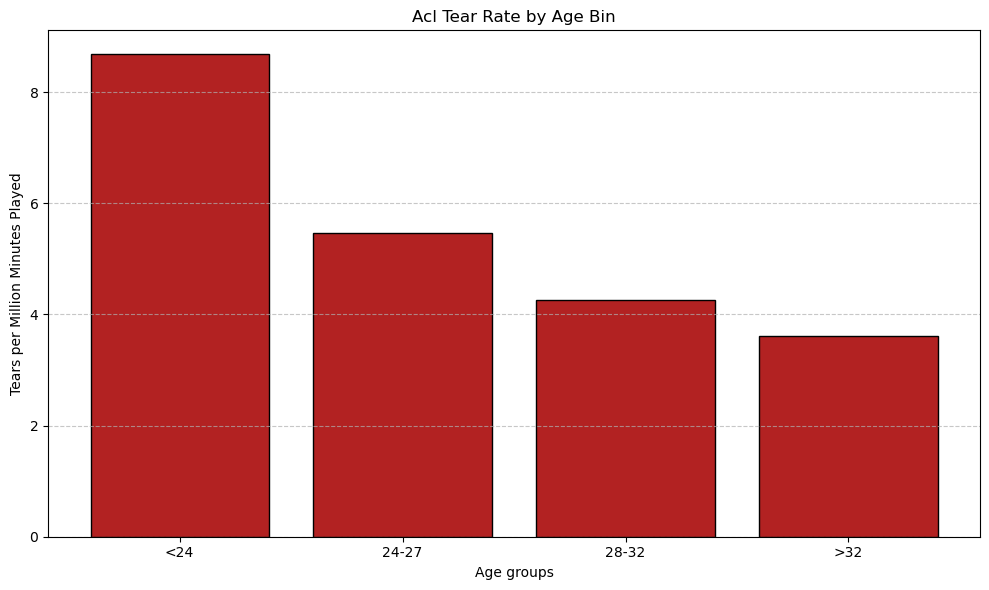

In [74]:
import matplotlib.pyplot as plt

# Using the pre-existing DataFrame: rate_achilles_per_mil
# Let's ensure the index is in the desired order
rate_acl_per_mil = rate_acl_per_mil.loc[["<24", "24-27", "28-32", ">32"]]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(rate_acl_per_mil.index, rate_acl_per_mil["acl_tear_rate"], color="firebrick", edgecolor="black")

# Labeling
plt.title("Acl Tear Rate by Age Bin")
plt.xlabel("Age groups")
plt.ylabel("Tears per Million Minutes Played")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

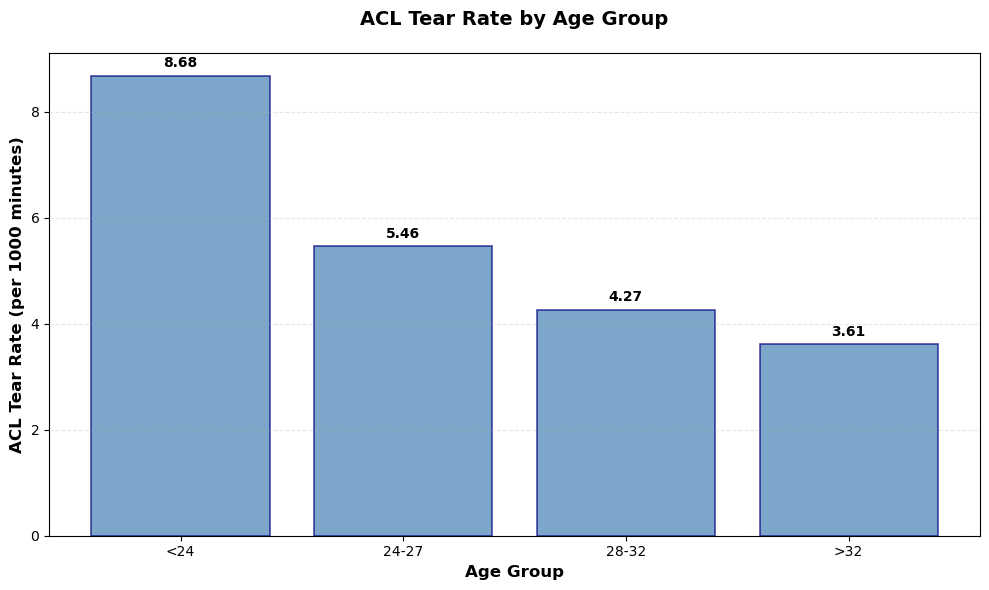

ACL Tear Rate Summary:
age_bin  acl_tear_rate
    <24       8.676584
  24-27       5.462643
  28-32       4.265103
    >32       3.611347


In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the dataframe from your data
data = {
    'age_bin': ['<24', '24-27', '28-32', '>32'],
    'acl_tear_count': [22, 18, 11, 3],
    'total_mins': [2535560, 3295108, 2579070, 830715],
    'acl_tear_rate': [8.676584, 5.462643, 4.265103, 3.611347]
}

rate_acl_per_mil = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rate_acl_per_mil['age_bin'], rate_acl_per_mil['acl_tear_rate'], 
               color='steelblue', alpha=0.7, edgecolor='navy', linewidth=1.2)

# Customize the chart
plt.xlabel('Age Group', fontsize=12, fontweight='bold')
plt.ylabel('ACL Tear Rate (per 1000 minutes)', fontsize=12, fontweight='bold')
plt.title('ACL Tear Rate by Age Group', fontsize=14, fontweight='bold', pad=20)

# Add value labels on top of each bar
for bar, rate in zip(bars, rate_acl_per_mil['acl_tear_rate']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{rate:.2f}', ha='center', va='bottom', fontweight='bold')

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Optional: Print summary statistics
print("ACL Tear Rate Summary:")
print(rate_acl_per_mil[['age_bin', 'acl_tear_rate']].to_string(index=False))

In [81]:
rate_achilles = pd.concat([achilles_counts, total_min_per_age], axis=1.)
rate_achilles.head()

,achilles_tear_count,total_mins
age_bin,,
24-27,12,3295108
28-32,16,2579070
<24,7,2535560
>32,4,830715


In [82]:
rate_achilles["achilles_tear_rate"] = (rate_achilles["achilles_tear_count"] / rate_achilles["total_mins"]) * 1000000
rate_achilles_per_mil = rate_achilles.sort_index()

In [83]:
rate_achilles_per_mil.head()

,achilles_tear_count,total_mins,achilles_tear_rate
age_bin,,,
24-27,12,3295108,3.641762
28-32,16,2579070,6.203787
<24,7,2535560,2.760731
>32,4,830715,4.815129


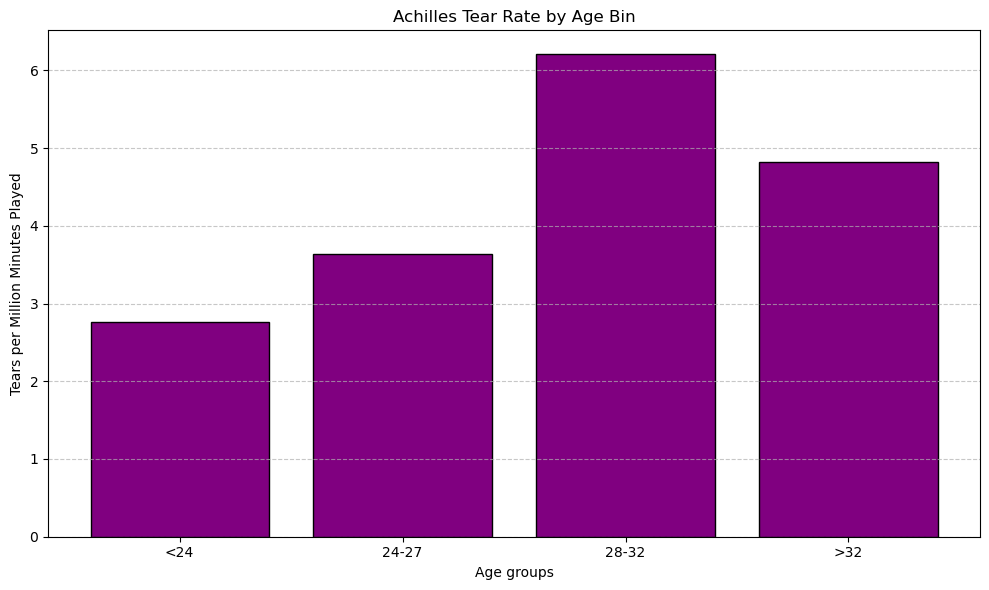

In [87]:
import matplotlib.pyplot as plt

# Using the pre-existing DataFrame: rate_achilles_per_mil
# Let's ensure the index is in the desired order
rate_achilles_per_mil = rate_achilles_per_mil.loc[["<24", "24-27", "28-32", ">32"]]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(rate_achilles_per_mil.index, rate_achilles_per_mil["achilles_tear_rate"], color="purple", edgecolor="black")

# Labeling
plt.title("Achilles Tear Rate by Age Bin")
plt.xlabel("Age groups")
plt.ylabel("Tears per Million Minutes Played")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

I am not sure how telling this info is because, maybe the players in those age groups are playing alot more minutes per game and so are much more likely to tear their acl / achilles. These are not independent 

In [ ]:
total_min_per_game = all_stats2.groupby("age_bin")["mp"].sum()/[.rename("total_mins")

In [406]:
all_stats_valid = all_stats[all_stats["g"] > 0]

# Now group by age and compute average minutes per game
avg_mp_per_game = (
    all_stats_valid.groupby("age")
    .apply(lambda x: x["mp"].sum() / x["g"].sum())
    .rename("avg_minutes_per_game")
)

# To display:
print(avg_mp_per_game)

age
19    21.461368
20    21.403430
21    21.376122
22    21.095809
23    21.549839
24    21.653603
25    22.620227
26    23.795981
27    23.820723
28    24.280472
29    24.365250
30    23.615277
31    23.411216
32    23.036682
33    22.937204
34    22.828699
35    22.369131
36    21.309084
37    21.491504
38    19.818813
39    20.790224
40    21.013158
41    15.619718
42    16.879518
43    14.600000
Name: avg_minutes_per_game, dtype: float64


/var/folders/hf/0g2fkdgs0jzfkqbc_78937t40000gn/T/ipykernel_80526/2165853117.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["mp"].sum() / x["g"].sum())


I only want players who have played more than 8 games in a season ro

/var/folders/hf/0g2fkdgs0jzfkqbc_78937t40000gn/T/ipykernel_80526/4056276649.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["mp"].sum() / x["g"].sum())


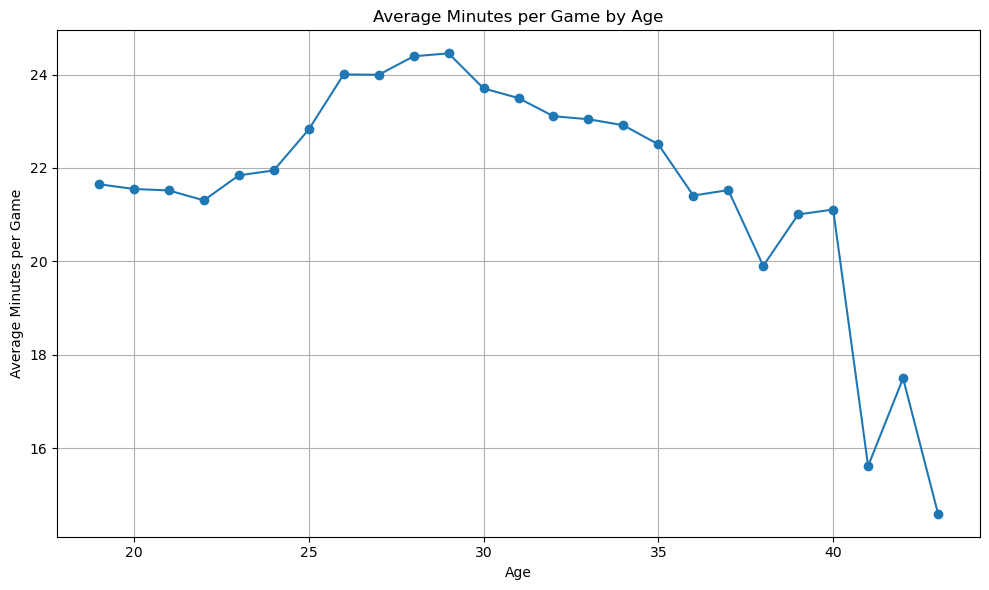

In [412]:
import matplotlib.pyplot as plt

# Calculate average minutes per game by age
all_stats["mp"] = pd.to_numeric(all_stats["mp"], errors="coerce")
all_stats["g"] = pd.to_numeric(all_stats["g"], errors="coerce")
all_stats_valid = all_stats[all_stats["g"] > 0]

filtered_stats = all_stats[all_stats["g"] >= 10]

avg_mp_per_game = (
    filtered_stats.groupby("age")
    .apply(lambda x: x["mp"].sum() / x["g"].sum())
    .rename("avg_minutes_per_game")
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_mp_per_game.index, avg_mp_per_game.values, marker='o', linestyle='-')
plt.title("Average Minutes per Game by Age")
plt.xlabel("Age")
plt.ylabel("Average Minutes per Game")
plt.grid(True)
plt.tight_layout()
plt.show()



/var/folders/hf/0g2fkdgs0jzfkqbc_78937t40000gn/T/ipykernel_80526/2634780979.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["mp"].sum() / x["g"].sum())


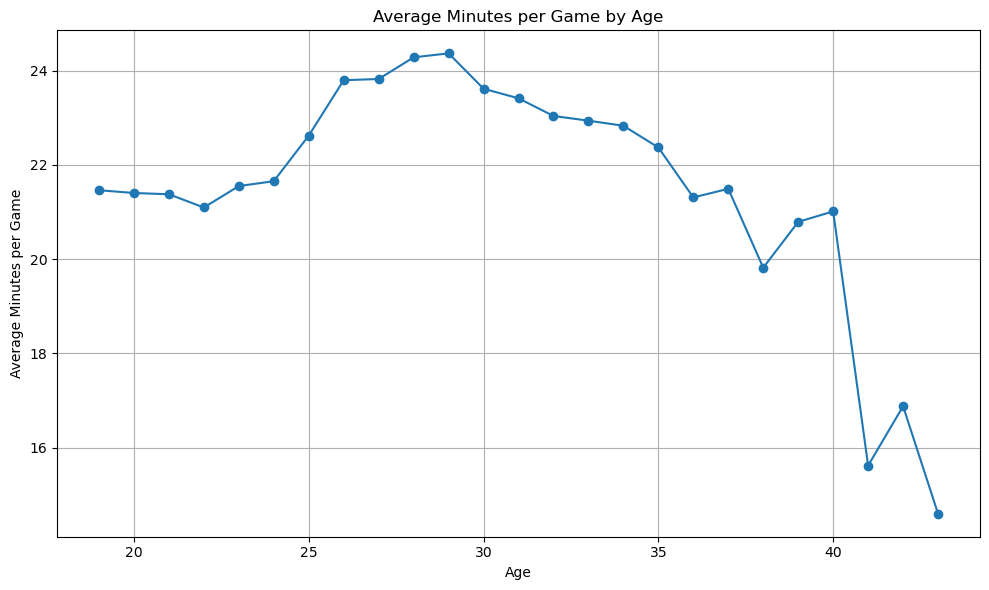

In [409]:
import matplotlib.pyplot as plt

# Calculate average minutes per game by age
all_stats["mp"] = pd.to_numeric(all_stats["mp"], errors="coerce")
all_stats["g"] = pd.to_numeric(all_stats["g"], errors="coerce")
all_stats_valid = all_stats[all_stats["g"] > 0]



avg_mp_per_game = (
    all_stats_valid.groupby("age")
    .apply(lambda x: x["mp"].sum() / x["g"].sum())
    .rename("avg_minutes_per_game")
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_mp_per_game.index, avg_mp_per_game.values, marker='o', linestyle='-')
plt.title("Average Minutes per Game by Age")
plt.xlabel("Age")
plt.ylabel("Average Minutes per Game")
plt.grid(True)
plt.tight_layout()
plt.show()


In [417]:
injuires_df3 = injuries_df2.merge(all_stats2["player"]

acl_players = injuries_df3[injuries_df3["reason"] == "torn acl"]

# Group by player, sum total minutes and count seasons
acl_mp = acl_players.groupby("player").agg(
    total_minutes=("mp", "sum"),
    seasons_played=("season", "nunique")
)
acl_mp["avg_minutes_per_season"] = acl_mp["total_minutes"] / acl_mp["seasons_played"]

avg_acl_minutes_per_season = acl_mp["avg_minutes_per_season"].mean()
print(f"Avg minutes per season (ACL players): {avg_acl_minutes_per_season:.2f}")

KeyError: "Column(s) ['mp'] do not exist"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='injury_type', bins=15, kde=True, palette=['#2C3E50', '#E74C3C'])

plt.title('Age Distribution at Time of ACL vs Achilles Injury', fontsize=16, fontweight='bold')
plt.xlabel('Age at Time of Injury', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Injury Type', title_fontsize=13, fontsize=12)
plt.tight_layout()
plt.show()


In [17]:
injuries_df2 = pd.read_csv("/Users/noah/Desktop/NBA_injuries_project/newest_injury_df.csv")
injuries_df2.head()

,Unnamed: 0,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season,age,season_y
0,0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10
1,1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10
2,2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10
3,3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10
4,4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10


In [20]:
acl_counts = injuries_df2[injuries_df2["reason"] == "torn acl"].groupby("age_bin").size().rename("acl_tear_count")
achilles_counts = injuries_df2[injuries_df2["reason"] == "torn achilles"].groupby("age_bin").size().rename("achilles_tear_count")

In [38]:
acl_counts

age_bin
25-29    18
30-34    10
<25      25
>34       1
Name: acl_tear_count, dtype: int64

In [37]:
all_stats.head()

,rk,player,age,team,pos,g,gs,mp,fg,fga,...,ast,stl,blk,tov,pf,pts,trp-dbl,awards,player-additional,season
0,238,A.J. Price,23,IND,PG,56,2,865,145,354,...,106,35,3,59,53,410,0,NaN,priceaj01,2009-10
1,15,Aaron Brooks,25,HOU,PG,82,82,2919,575,1331,...,434,69,14,232,199,1604,0,MIP-1,brookaa01,2009-10
2,360,Aaron Gray,25,2TM,C,32,0,311,42,82,...,22,9,11,18,54,104,0,NaN,grayaa01,2009-10
3,360,Aaron Gray,25,CHI,C,8,0,50,8,21,...,2,0,0,1,10,18,0,NaN,grayaa01,2009-10
4,360,Aaron Gray,25,NOH,C,24,0,261,34,61,...,20,9,11,17,44,86,0,NaN,grayaa01,2009-10


no one under the age of 23 has ever tore their achilles in the NBA